# Anemia - ml.GaussianNB

In [1]:
import some_load_train_evaluate_functions as ml

In [2]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [3]:
# Anemia data

anemia_df = ml.get_data_of_disease(driver, 'Anemia')
anemia_df

,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],Basophils [%],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Anemia
0,93703,0,2,17.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,93704,1,2,15.7,74.4,NaN,NaN,NaN,NaN,0.7,...,36.60,NaN,13.1,NaN,NaN,NaN,NaN,30.6,NaN,0
2,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,1.0,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0
3,93706,1,18,21.5,53.8,1.629630,0.160,0.031,16.765,0.8,...,284.00,16.0,16.3,NaN,NaN,142.0,51.0,34.0,NaN,0
4,93707,1,13,18.1,58.2,1.857143,0.009,0.044,22.756,0.5,...,49.30,9.0,14.5,NaN,NaN,177.0,21.0,34.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8877,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,0.6,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,0
8878,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,0.6,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0
8879,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,1.4,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0
8880,102955,0,14,45.6,61.9,1.205882,0.031,0.079,17.856,0.9,...,11.40,16.0,11.4,NaN,NaN,158.0,5.0,57.7,NaN,0


### Training

In [4]:
gaussian_nb = ml.GaussianNB()

# Attributes and Labels

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

# Training

gaussian_nb.fit(X_train, y_train)

# Accuracy scores

y_pred = gaussian_nb.predict(X_val)

print('Training Accuracy: ',ml.accuracy_score(y_train, gaussian_nb.predict(X_train)))

print('Testing Accuracy: ',ml.accuracy_score(y_val, y_pred))

Training Accuracy:  0.8730471498944405
Testing Accuracy:  0.8789414414414415


## Feature Selection

### Correlation Analysis

In [5]:
gaussian_nb_test = ml.GaussianNB()

In [21]:
pos_corr, neg_corr = ml.get_correlated_features(anemia_df,'Anemia',pos=0.0,neg=-0.0)

corr_features = list(pos_corr.keys()[1:]) + list(neg_corr.keys())
corr_features[:30]

['Red cell distribution width [%]',
 'Transferrin receptor [nmol/L]',
 'Platelet_Lymphocyte Ratio',
 'UIBC [umol/L]',
 'C-Reactive Protein [mg/L]',
 'Age',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Systemic Immune‐inflammation Index (SII)',
 'Globulin [g/dL]',
 'Neutrophil_Lymphocyte Ratio',
 'Cobalt [nmol/L]',
 'Segmented neutrophils [%]',
 'Blood cadmium [nmol/L]',
 'Creatinine [mg/dL]',
 'Chloride [mmol/L]',
 'Total Iron Binding Capacity [umol/L]',
 'Blood manganese [nmol/L]',
 'Insulin [pmol/L]',
 'Osmolality [mmol/Kg]',
 'Platelet count [1000 cells/uL]',
 'Platelet_WBC Ratio',
 'Fasting Glucose [mmol/L]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Gamma-tocopherol [umol/L]',
 'Retinol [umol/L]',
 'Direct HDL-Cholesterol [mmol/L]',
 'Glycohemoglobin [%]',
 'Mean platelet volume [fL]',
 'Basophils [%]']

In [22]:
ml.evaluate_feature_set(corr_features[:30], gaussian_nb_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.900

Test Accuracy: 0.898

Precision: 0.142

Recall: 0.331

F1-Score: 0.199


### SelectFromModel

In [10]:
sfm_features = ml.select_from_model_features(ml.LogisticRegression(),X,y)
sfm_features

['Gender',
 'Age',
 'A/G Ratio',
 'Alpha-crypotoxanthin [umol/L]',
 'Blood mercury [nmol/L]',
 'Globulin [g/dL]',
 'Glycohemoglobin [%]',
 'Hematocrit [%]',
 'Hydroxycotinine [ng/mL]',
 'Iron frozen [umol/L]',
 'Mean cell hemoglobin [pg]',
 'Mean cell volume [fL]',
 'Neutrophil_Lymphocyte Ratio',
 'Osmolality [mmol/Kg]',
 'Platelet count [1000 cells/uL]',
 'Platelet_Lymphocyte Ratio',
 'RBC count [million cells/uL]',
 'Red cell distribution width [%]',
 'Retinol [umol/L]',
 'Retinyl palmitate [umol/L]',
 'Sodium [mmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Cholestrol_HDL Ratio',
 'Total Lycopene [umol/L]',
 'Trans-lycopene [umol/L]',
 'Alanine Aminotransferase [U/L]',
 'Albumin [g/dL]',
 'Hemoglobin [g/dL]',
 'Transferrin Saturation [%]',
 'Transferrin receptor [nmol/L]']

In [11]:
sfm_features = list(sfm_features)

ml.evaluate_feature_set(sfm_features, gaussian_nb_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.897

Test Accuracy: 0.899

Precision: 0.183

Recall: 0.471

F1-Score: 0.263


### SelectKBest

In [12]:
k_best_features = ml.select_k_best(X, y, n=30)
k_best_features[:30]

['Red cell distribution width [%]',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Transferrin receptor [nmol/L]',
 'RBC count [million cells/uL]',
 'Albumin [g/dL]',
 'Gender',
 'A/G Ratio',
 'Transferrin Saturation [%]',
 'Mean cell hemoglobin [pg]',
 'Platelet_Lymphocyte Ratio',
 'Iron [ug/dL]',
 'Iron frozen [umol/L]',
 'Age',
 'UIBC [umol/L]',
 'C-Reactive Protein [mg/L]',
 'Total Calcium [mg/dL]',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Bilirubin [mg/dL]',
 'Globulin [g/dL]',
 'Neutrophil_Lymphocyte Ratio',
 'Alpha-crypotoxanthin [umol/L]',
 'Alanine Aminotransferase [U/L]',
 'Mean cell volume [fL]',
 'Segmented neutrophils [%]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Lymphocyte [%]']

In [13]:
ml.evaluate_feature_set(k_best_features[:30], gaussian_nb_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.891

Test Accuracy: 0.897

Precision: 0.176

Recall: 0.463

F1-Score: 0.256


### Recursive Feature Elimination (RFE) 

In [14]:
rfe_features = ml.select_rfe_features(ml.LogisticRegression(),X,y,n=30,step=0.5)
rfe_features[:30]

['Gender',
 'Mean cell volume [fL]',
 'Mean cell hemoglobin [pg]',
 'Osmolality [mmol/Kg]',
 'Transferrin receptor [nmol/L]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Platelet count [1000 cells/uL]',
 'Iron frozen [umol/L]',
 'RBC count [million cells/uL]',
 'Red cell distribution width [%]',
 'Hematocrit [%]',
 'Glycohemoglobin [%]',
 'Sodium [mmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Non_HDL Ratio',
 'Total Cholestrol_HDL Ratio',
 'Neutrophil_Lymphocyte Ratio',
 'Albumin [g/dL]',
 'Age',
 'Blood mercury [nmol/L]',
 'Transferrin Saturation [%]',
 'Trans-lycopene [umol/L]',
 'Hemoglobin [g/dL]',
 'A/G Ratio',
 'Creatine Phosphokinase [IU/L]',
 'White blood cell count [1000 cells/uL]',
 'Blood Urea Nitrogen [mg/dL]',
 'Alanine Aminotransferase [U/L]',
 'Total Lycopene [umol/L]',
 'Alpha-crypotoxanthin [umol/L]']

In [15]:
ml.evaluate_feature_set(rfe_features[:30], gaussian_nb_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.883

Test Accuracy: 0.888

Precision: 0.174

Recall: 0.515

F1-Score: 0.260


### Lasso Regularization

In [16]:
l1_selected_features = ml.log_reg_lasso_select(X_train, y_train)
l1_selected_features[:30]

['Gender',
 'Red cell distribution width [%]',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'Age',
 'Alpha-crypotoxanthin [umol/L]',
 'Retinyl palmitate [umol/L]',
 'Blood mercury [nmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Retinol [umol/L]',
 'Transferrin receptor [nmol/L]',
 'Neutrophil_Lymphocyte Ratio',
 'Hydroxycotinine [ng/mL]',
 'RBC count [million cells/uL]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Total Calcium [mg/dL]',
 'Beta-cryptoxanthin [umol/L]',
 'Alanine Aminotransferase [U/L]',
 'Glycohemoglobin [%]',
 'Total Cholestrol_HDL Ratio',
 'Uric Acid [mg/dL]',
 'Trans-lycopene [umol/L]',
 'Transferrin Saturation [%]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Blood cadmium [nmol/L]',
 'Sodium [mmol/L]',
 'Iron frozen [umol/L]',
 'Fasting Glucose [mmol/L]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Blood Urea Nitrogen [mg/dL]']

In [17]:
ml.evaluate_feature_set(l1_selected_features[:30], gaussian_nb_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.895

Test Accuracy: 0.898

Precision: 0.180

Recall: 0.471

F1-Score: 0.261


### Relief F

In [18]:
relieff_features = ml.relief_feature_select(30,X,y)

In [19]:
relieff_features[:30]

['Age',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'Segmented neutrophils [%]',
 'Lymphocyte [%]',
 'BMI',
 'Neutrophil_Lymphocyte Ratio',
 'RBC count [million cells/uL]',
 'Mean cell volume [fL]',
 'Mean cell hemoglobin [pg]',
 'Red cell distribution width [%]',
 'A/G Ratio',
 'Transferrin Saturation [%]',
 'Gender',
 'Albumin [g/dL]',
 'Uric Acid [mg/dL]',
 'Systemic Immune‐inflammation Index (SII)',
 'Platelet_Lymphocyte Ratio',
 'Iron [ug/dL]',
 'Osmolality [mmol/Kg]',
 'Iron frozen [umol/L]',
 'Retinol [umol/L]',
 'Total Calcium [mg/dL]',
 'Chloride [mmol/L]',
 'Non_HDL Ratio',
 'Total Cholesterol [mmol/L]',
 'UIBC [umol/L]',
 'Globulin [g/dL]',
 'Blood selenium [umol/L]',
 'Bicarbonate [mmol/L]']

In [20]:
ml.evaluate_feature_set(relieff_features[:30], gaussian_nb_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.886

Test Accuracy: 0.890

Precision: 0.170

Recall: 0.485

F1-Score: 0.252


### Optimal no. of features

In [23]:
final_features = list(sfm_features)

Finding optimal no. of features..: 100%|████████| 26/26 [00:00<00:00, 30.53it/s]



Maximum accuracy = 0.9601 for 5 features


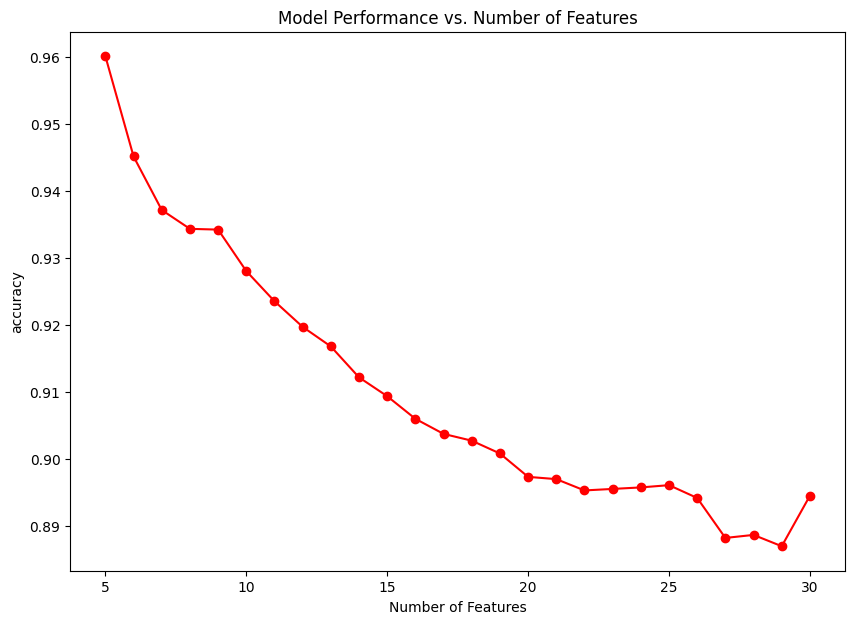

In [24]:
# Optimal no. of features

ml.plot_num_feature_performance(gaussian_nb_test,  X, y, final_features, scoring='accuracy')

Finding optimal no. of features..: 100%|████████| 26/26 [00:01<00:00, 25.56it/s]


Maximum f1 = 0.2450 for 19 features


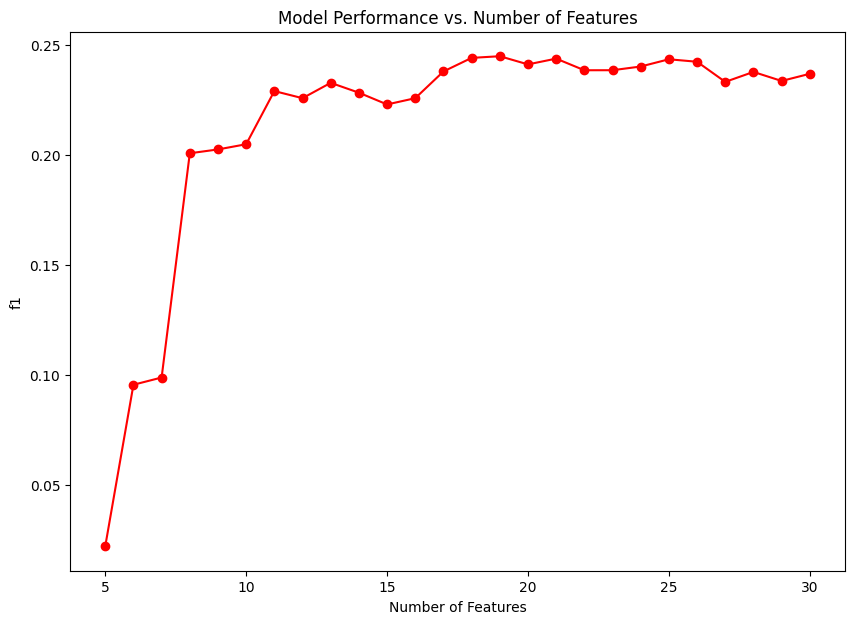

In [25]:
# Optimal no. of features

ml.plot_num_feature_performance(gaussian_nb_test,  X, y, final_features, scoring='f1')

Finding optimal no. of features..: 100%|████████| 26/26 [00:01<00:00, 25.53it/s]


Maximum recall = 0.4540 for 28 features


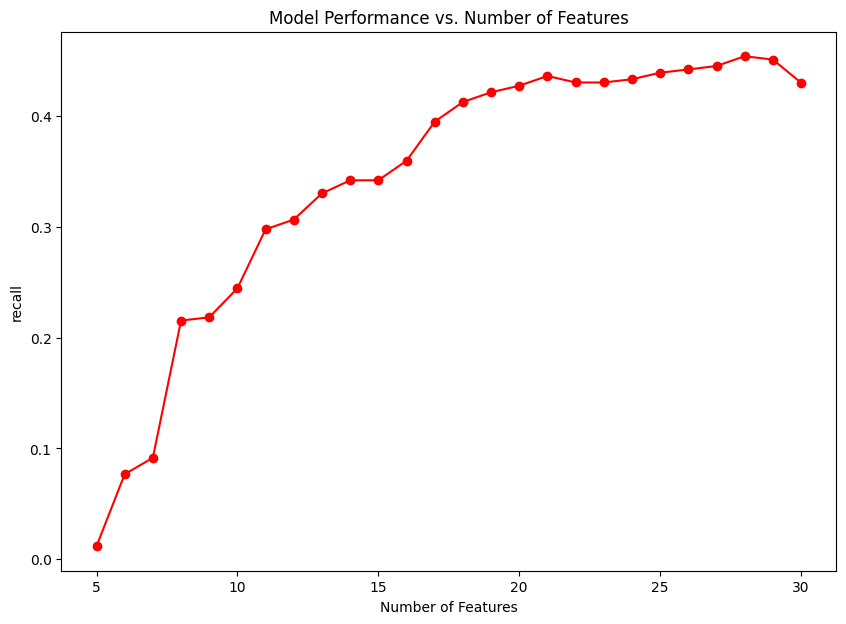

In [26]:
# Optimal no. of features

ml.plot_num_feature_performance(gaussian_nb_test,  X, y, final_features, scoring='recall')

In [29]:
num_features = 19

selected = final_features[:num_features]
selected.append('Anemia')

anemia_df = anemia_df[selected]

In [30]:
# Save feature set
    
with open('../Models/Anemia/Feature Sets/GaussianNB Features.pkl', 'wb') as f:
    ml.pickle.dump(selected, f)

## Preprocessing

### Zero Imputation

In [31]:
# Imputing null values with zeroes

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                        impute = True, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)

In [32]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.851

Test Accuracy: 0.863

Precision: 0.126

Recall: 0.434

F1-Score: 0.195


### Mode Imputation

In [33]:
# Imputing with most frequent values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='most_frequent'),
                                                              random_state=42)

In [34]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.902

Test Accuracy: 0.904

Precision: 0.176

Recall: 0.412

F1-Score: 0.247


### k-NN Imputation

In [35]:
# Imputing missing values with values from the k-nearest neighbors in the feature space

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.KNNImputer(n_neighbors=20),
                                                              random_state=42)

In [36]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.906

Test Accuracy: 0.909

Precision: 0.187

Recall: 0.412

F1-Score: 0.257


### Multiple Imputation by Chained Equations (MICE)

In [37]:
# Imputes by looking at data from other columns and trying to estimate the best prediction for each missing value.

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.IterativeImputer(max_iter=20),
                                                              random_state=42)

In [38]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.902

Test Accuracy: 0.905

Precision: 0.180

Recall: 0.419

F1-Score: 0.252


### Median Imputation

In [39]:
# Imputing with median values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='median'),
                                                              random_state=42)

In [40]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.901

Test Accuracy: 0.904

Precision: 0.182

Recall: 0.434

F1-Score: 0.257


### Mean Imputation

In [41]:
# Splitting and Preprocessing data

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

In [42]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.902

Test Accuracy: 0.904

Precision: 0.183

Recall: 0.434

F1-Score: 0.258


### Dropping Null Values

In [43]:
# Drop null values
anemia_df_na = anemia_df.dropna()

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df_na, label = 'Anemia',
                                                              impute = False, scale=True,
                                                              random_state=42)

In [44]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.896

Test Accuracy: 0.890

Precision: 0.239

Recall: 0.496

F1-Score: 0.322


## Oversampling and Undersampling

### Random Oversampling

In [45]:
X_ros, y_ros = ml.random_over_sample(X_train, y_train)

gaussian_nb.fit(X_ros, y_ros)

ml.evaluate_model_metrics(gaussian_nb,X_ros, y_ros,X_val, y_val)


Train Accuracy: 0.737

Test Accuracy: 0.795

Precision: 0.156

Recall: 0.658

F1-Score: 0.252


### SMOTE (Synthetic Minority Over-sampling Technique)

In [46]:
X_smote, y_smote = ml.smote_over_sample(X_train, y_train)

gaussian_nb.fit(X_smote, y_smote)

ml.evaluate_model_metrics(gaussian_nb,X_smote, y_smote,X_val, y_val)


Train Accuracy: 0.748

Test Accuracy: 0.726

Precision: 0.126

Recall: 0.709

F1-Score: 0.214


### Random Undersampling

In [47]:
X_rus, y_rus = ml.random_under_sample(X_train, y_train)

gaussian_nb.fit(X_rus, y_rus)

ml.evaluate_model_metrics(gaussian_nb,X_rus, y_rus,X_val, y_val)


Train Accuracy: 0.751

Test Accuracy: 0.789

Precision: 0.155

Recall: 0.675

F1-Score: 0.252


### Tomek Links

In [48]:
X_tomek, y_tomek = ml.tomek_links(X_train, y_train)

gaussian_nb.fit(X_tomek, y_tomek)

ml.evaluate_model_metrics(gaussian_nb,X_tomek, y_tomek,X_val, y_val)


Train Accuracy: 0.898

Test Accuracy: 0.887

Precision: 0.231

Recall: 0.496

F1-Score: 0.315


### SMOTE + Tomek Links

In [49]:
X_smote_tomek, y_smote_tomek = ml.smote_tomek(X_train, y_train)

gaussian_nb.fit(X_smote_tomek, y_smote_tomek)

ml.evaluate_model_metrics(gaussian_nb,X_smote_tomek, y_smote_tomek,X_val, y_val)


Train Accuracy: 0.748

Test Accuracy: 0.726

Precision: 0.126

Recall: 0.709

F1-Score: 0.214


In [50]:
# Model seems to perform better without oversampling or undersampling

## Hyperparameter Optimization 

### Grid Search

In [51]:
# Since ml.GaussianNB is a very simple model there aren't much hyperparamters to tune

param_grid = {
    
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]

}

In [52]:
grid_best_params, gaussian_nb_grid = ml.grid_search_optimize(gaussian_nb, param_grid, X_train, 
                                                                y_train, cv=10,scoring='accuracy')

In [53]:
grid_best_params

{'var_smoothing': 1e-09}

In [54]:
ml.evaluate_model_metrics(gaussian_nb_grid,X_train,y_train,X_val,y_val)


Train Accuracy: 0.896

Test Accuracy: 0.890

Precision: 0.239

Recall: 0.496

F1-Score: 0.322


### Random Search

In [55]:

rand_best_params, gaussian_nb_rand = ml.random_search_optimize(gaussian_nb,param_grid,n_iter=100,cv=5,
                                                               X_train=X_train, y_train=y_train,
                                                               scoring='accuracy')

In [56]:
rand_best_params

{'var_smoothing': 1e-09}

In [57]:
ml.evaluate_model_metrics(gaussian_nb_rand,X_train,y_train,X_val,y_val)


Train Accuracy: 0.896

Test Accuracy: 0.890

Precision: 0.239

Recall: 0.496

F1-Score: 0.322


### Optuna

In [58]:
def objective(trial):

    var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-1)

    model = ml.GaussianNB(var_smoothing=var_smoothing)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = ml.accuracy_score(y_test, y_pred)

    return accuracy

In [59]:
best_trial , gaussian_nb_opt = ml.optuna_optimize(objective, ml.GaussianNB, n_trials=150)

In [60]:
best_trial

{'var_smoothing': 0.09864495394734528}

In [61]:
gaussian_nb_opt.fit(X_train,y_train)

ml.evaluate_model_metrics(gaussian_nb_opt,X_train,y_train,X_val,y_val)


Train Accuracy: 0.905

Test Accuracy: 0.899

Precision: 0.251

Recall: 0.462

F1-Score: 0.325


## Evaluation on Test Set


Train Accuracy: 0.905

Test Accuracy: 0.910

Precision: 0.228

Recall: 0.439

F1-Score: 0.300

Confusion Matrix:

[[1984  146]
 [  55   43]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.97      0.93      0.95      2130
     Class 1       0.23      0.44      0.30        98

    accuracy                           0.91      2228
   macro avg       0.60      0.69      0.63      2228
weighted avg       0.94      0.91      0.92      2228


ROC-AUC Curve:


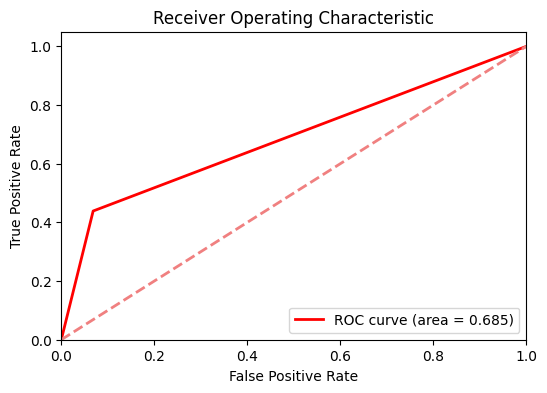

In [62]:
# After evaluating on the validation set, we evaluate and finalize on the test set

ml.evaluate_model_metrics(gaussian_nb_opt, X_train, y_train, X_test, y_test, verbose=6)

## Cross Validation

### K-fold

In [63]:
ml.k_cross_validate(gaussian_nb,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.89784946 0.88509874 0.91382406 0.9048474  0.90305206 0.87971275
 0.89587074 0.9048474  0.88689408 0.91382406]

Mean accuracy score:  0.8985820737051409

Standard deviation:  0.011160083210940431


In [64]:
ml.k_cross_validate(gaussian_nb_grid,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.89784946 0.88509874 0.91382406 0.9048474  0.90305206 0.87971275
 0.89587074 0.9048474  0.88689408 0.91382406]

Mean accuracy score:  0.8985820737051409

Standard deviation:  0.011160083210940431


In [65]:
ml.k_cross_validate(gaussian_nb_rand,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.89784946 0.88509874 0.91382406 0.9048474  0.90305206 0.87971275
 0.89587074 0.9048474  0.88689408 0.91382406]

Mean accuracy score:  0.8985820737051409

Standard deviation:  0.011160083210940431


In [66]:
ml.k_cross_validate(gaussian_nb_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.90322581 0.8994614  0.91561939 0.91202873 0.9048474  0.89048474
 0.91023339 0.91382406 0.89048474 0.92100539]

Mean accuracy score:  0.9061215034458794

Standard deviation:  0.009829822942790521


### Stratified K-fold

In [67]:
ml.stratified_k_cross_validate(gaussian_nb,X,y,n_splits=10)


Average Accuracy: 0.8969653095500087

Average Precision: 0.22149250358224007

Average Recall: 0.46452991452991454

Average F1-Score: 0.2983324338764134


In [68]:
ml.stratified_k_cross_validate(gaussian_nb_grid,X,y,n_splits=10)


Average Accuracy: 0.8969653095500087

Average Precision: 0.22149250358224007

Average Recall: 0.46452991452991454

Average F1-Score: 0.2983324338764134


In [69]:
ml.stratified_k_cross_validate(gaussian_nb_rand,X,y,n_splits=10)


Average Accuracy: 0.8969653095500087

Average Precision: 0.22149250358224007

Average Recall: 0.46452991452991454

Average F1-Score: 0.2983324338764134


In [70]:
ml.stratified_k_cross_validate(gaussian_nb_opt,X,y,n_splits=10)


Average Accuracy: 0.9061202164694375

Average Precision: 0.23631855519248424

Average Recall: 0.4418803418803419

Average F1-Score: 0.3060257708872755


### Save Model

In [71]:
final_gaussian_estimator = gaussian_nb_opt

In [72]:
# Saving the model

ml.save_model(final_gaussian_estimator, "../Models/Anemia/ml.GaussianNB.pkl")

Saved Model


## Prediction

In [73]:
# Predicting on perturbed values

ml.predict_on_modified_instance(final_gaussian_estimator, X_test.iloc[0], y_test.iloc[0], 0.4)

Instance:
 [ 1.          0.8425501   0.26191837 -0.46603424  0.11412199 -0.45058229
  0.23522432 -0.05658356 -0.32479476  0.24857096  0.53282152  0.47113013
 -0.10094165 -0.10885448 -0.09297576  1.14929321 -0.39000003 -0.78326675
  0.20431326]

Expected Class:  0

 Modified Instance:
 [ 1.          0.62038027  0.47707949 -0.66885614  0.0091362  -0.51914907
  0.26947838 -0.25342517 -0.09921986  0.4388819   0.64203885  0.11700839
  0.025935    0.02059149 -0.06740335  1.21552829 -0.27772062 -0.93227434
  0.10358791]

Predicted Class:  [0]


In [77]:
ml.predict_on_modified_instance(final_gaussian_estimator, X_test.iloc[3], y_test.iloc[3], 0.6)

Instance:
 [ 0.00000000e+00  4.61566466e-01 -3.70417306e+00 -1.11547980e+00
  2.70640467e-02  6.73501395e+00 -9.47243954e-01 -1.48700904e+00
  3.61323614e+00  8.61725034e-01  2.18455061e-01  4.86783879e-01
 -1.30381823e+00 -1.65965383e+00  1.64568263e-03 -8.36733511e-01
 -1.69135415e+00  1.87079347e+00 -2.40170977e+00]

Expected Class:  1

 Modified Instance:
 [ 0.          0.23189564 -3.60441945 -1.36359614 -0.23780841  6.78047276
 -1.18399985 -1.76600208  3.43881325  1.03848288  0.44078558  0.39374478
 -1.37270861 -1.97691922  0.07169092 -1.09029524 -1.79619705  1.71215472
 -2.33351655]

Predicted Class:  [1]


In [80]:
ml.predict_on_modified_instance(final_gaussian_estimator, X_test.iloc[34], y_test.iloc[34], 0.6)

Instance:
 [ 0.         -0.87187627  0.61063685 -0.71344207 -0.4341903  -0.21878886
 -1.04578298 -0.08042398 -0.32499761 -1.17701227  0.80789218  0.81551265
  1.24234423 -0.6257876   0.06472664  0.81166341 -0.60689238 -1.29933401
 -0.18904871]

Expected Class:  0

 Modified Instance:
 [ 0.         -0.87893969  0.80487523 -0.77291715 -0.6409781  -0.13875769
 -1.01294172 -0.02836441 -0.28235696 -1.20738113  0.78066801  0.81255392
  1.24985382 -0.41901531  0.19413593  0.68647146 -0.51214629 -1.224977
 -0.04253412]

Predicted Class:  [0]
